## Aufgabe 5 

### (a) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf den Bereich $x_\text{min}$ bis $x_\text{max}$ beschrieben. 

In [185]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(23)
generator = np.random.uniform(0,1,1000)


In [186]:
def gleichingrenzen(xmin, xmax, anzahl): 
    generator = np.random.uniform(0,1, anzahl)
    return np.array((xmax-xmin) * generator + xmin)

In [187]:
def gleich2exponential(tau): 
    return -np.log(1-generator)*tau  

In [188]:
def gleich2potenz(xmin, n): # noch falsch
    if n >= 2:
        return xmin*(1-generator)**(-1/n) 
    else: print("Bitte geben sie einen Wert für n größer oder gleich 2 ein.")

In [189]:
def gleich2cauchy():
    return np.tan(np.pi*generator) #Herleitung?

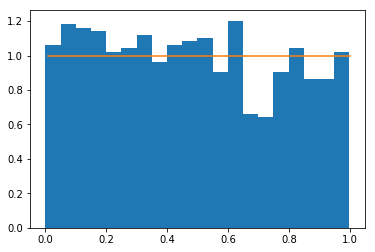

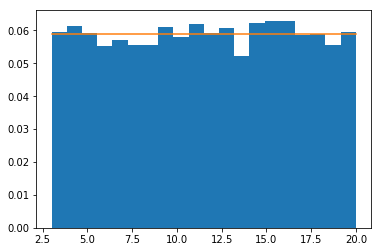

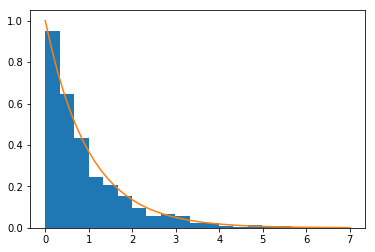

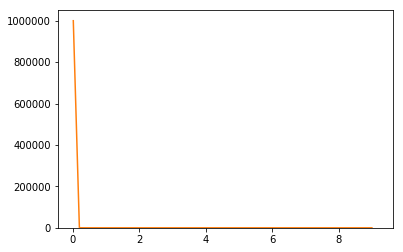

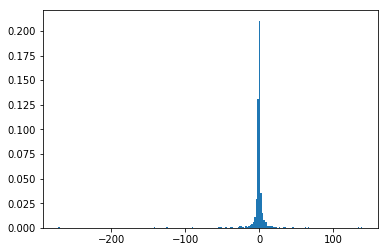

In [207]:
#Test 
a0 = generator
def gleichverteilt(a, b, x):
    return 1/(b-a) *x/x
plt.figure(0)
plt.hist(a0, bins= 20, density=True);
plt.plot(np.linspace(0.01 ,1), gleichverteilt(0, 1, np.linspace(0.01,1)))
a1 = gleichingrenzen(3,20, 10000)
plt.figure(1)
plt.hist(a1, bins= 20, density= True);
plt.plot(np.arange(3,21), gleichverteilt(3, 20, np.arange(3,21)))
def exp(tau, x):
    return 1/tau * np.exp(-x/tau)
a2 = gleich2exponential(1)
plt.figure(2)
plt.hist(a2, bins=20, density=True);
plt.plot(np.linspace(0,7), exp(1, np.linspace(0,7)))
def potenz(n, x):
    return x**(-n)
a3 = gleich2potenz(1, 3)
plt.figure(3)
plt.hist(a3, bins=20, density =True)
plt.plot(np.linspace(0.01,9), potenz(3, np.linspace(0.01, 9)))
def cauchy(x):
    return 1/np.pi * 1/(1-x**2)
a4 = gleich2cauchy()
plt.figure(4)
plt.hist(a4, bins= 200, density=True);
#plt.plot(np.linspace(-1,1), cauchy(np.linspace(-1, 1)))
None

In [191]:
def neumann(x,y):
    u1, u2 = gleichingrenzen(0,1, 10**5), gleichingrenzen(0, np.amax(y), 10**5) 
    u = []
    for i in range(len(u1)):
        index = np.argwhere((x < u1[i]+0.01) & (x >= u1[i]-0.01))
        if y[index[0,0]] > u2[i]:
            u = np.append(u, u1[i])
    return u

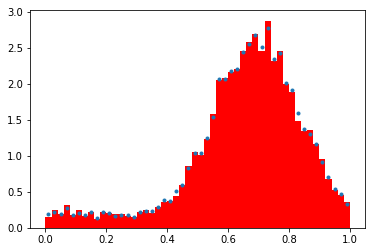

In [192]:
x,y = np.genfromtxt("empirisches_histogramm.csv", delimiter=",", unpack=True)
x = np.delete(x, 0)
y = np.delete(y, 0)
N = np.sum(0.02*y)
y = y/N
plt.figure(1)
plt.plot(x, y, "."); 
plt.hist(neumann(x,y), bins=50, color="red", density=True);
None

## Aufgabe 6 

### (a) 
Es soll ein Zufallszahlengenerator nach dem vorgegebenen Schema programmiert werden. Dabei sollen $b=3$ und $m = 1024$ gesetzt werden. 
Die Periodenlänge soll in Abhängigkeit von $a$ in einem angemessenen Bereich verwendet werden. 
Der Zusammenhang wird in einem Plot dargestellt. 


In [193]:
def lgc(n, a):
    x = np.array([10])
    for i in range(n):
        x = np.append(x, (a*x[i]+3)%1024) 
    return x    



In [194]:
# Test
def testfunc(a, max):
    anzahl = np.array([2])
    for i in range(1, a):
        for j in range(2, max):
            if lgc(j, i)[-1] == lgc(j, i)[-2]:
                anzahl = np.append(anzahl, j)
                break
            elif (j == max -1):
                anzahl = np.append(anzahl, j)
    return anzahl


In [195]:
b = 30
#y = testfunc(b, 1024)
#a = np.arange(0, b)

#plt.figure(1)
#plt.plot(a, y, "rx")
None

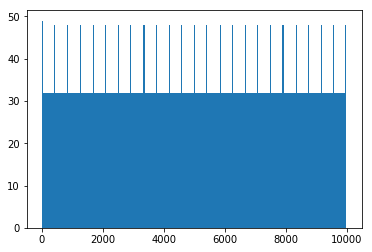

In [196]:
def newlgc(n, seeed):
    x = np.array([seeed])
    for i in range(n):
        x = np.append(x, (1601*x[i]+3456)%10000) 
    return x    

a = newlgc(10, 7) #verschiedene Seeeds testen, vielleicht for loop
#plt.figure(6)
plt.hist(a, bins= 300);

In [210]:
#new = newlgc(9998, 6).reshape(3, 3333)
#print(new1)
new1 = a[0::3]
new2 = a[1::3]
new3 = a[2::3]